<a href="https://colab.research.google.com/github/mraniketr/DeepLearningProjects/blob/master/Leaf_Disease_Classifier_Resnet_FAST_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 358kB 5.2MB/s 
     |████████████████████████████████| 1.0MB 8.9MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 10.5MB 14.4MB/s 
     |████████████████████████████████| 40kB 5.2MB/s 
     |████████████████████████████████| 92kB 10.6MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 2.6MB 47.0MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 1.1.1 which is incompatible.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive

In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
!pip install wget
import wget
wget.download("https://storage.googleapis.com/ibeans/train.zip")

'train.zip'

In [ ]:
!unzip train.zip

In [ ]:
bean_types = 'angular_leaf_spot','bean_rust','healthy'
path = Path('train')

In [ ]:
fns = get_image_files(path)
fns

(#1034) [Path('train/bean_rust/bean_rust_train.83.jpg'),Path('train/bean_rust/bean_rust_train.263.jpg'),Path('train/bean_rust/bean_rust_train.227.jpg'),Path('train/bean_rust/bean_rust_train.268.jpg'),Path('train/bean_rust/bean_rust_train.261.jpg'),Path('train/bean_rust/bean_rust_train.162.jpg'),Path('train/bean_rust/bean_rust_train.4.jpg'),Path('train/bean_rust/bean_rust_train.265.jpg'),Path('train/bean_rust/bean_rust_train.95.jpg'),Path('train/bean_rust/bean_rust_train.24.jpg')...]

In [ ]:
beans = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = beans.dataloaders(path)

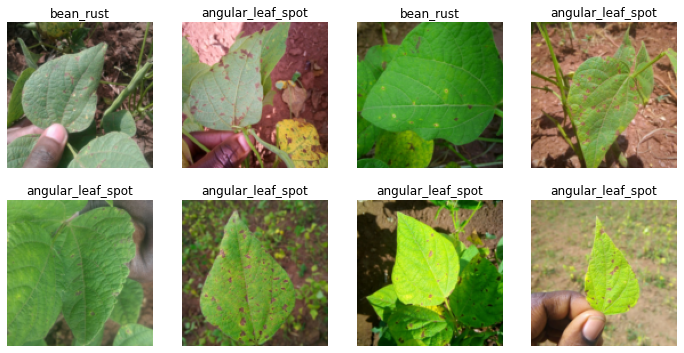

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

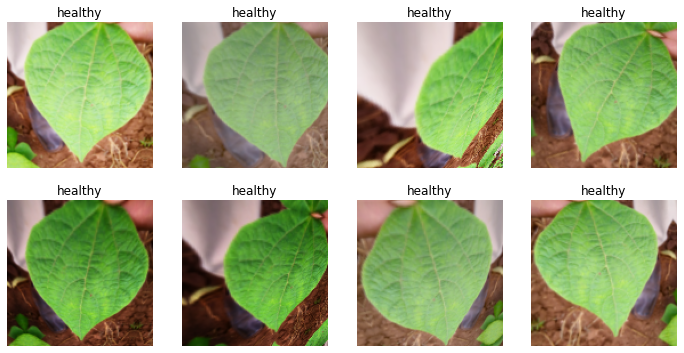

In [ ]:
beans = beans.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = beans.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
beans = beans.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = beans.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.471131,0.748285,0.262136,02:26


epoch,train_loss,valid_loss,error_rate,time
0,0.713630,0.413389,0.145631,03:23
1,0.559594,0.311715,0.116505,03:23
2,0.441555,0.230146,0.092233,03:23
3,0.358515,0.210695,0.082524,03:23


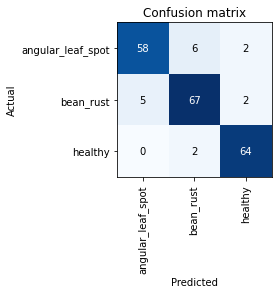

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

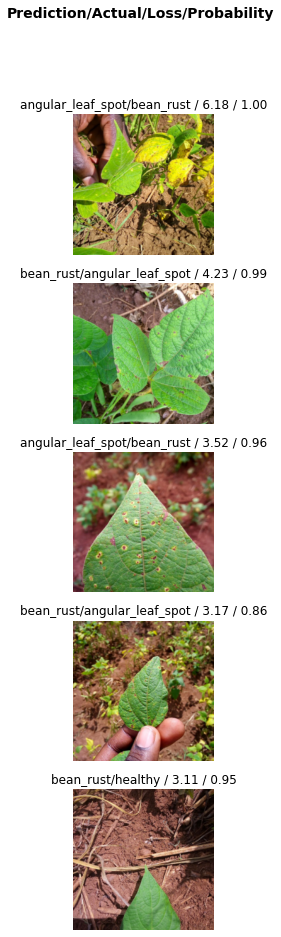

In [ ]:
interp.plot_top_losses(5, nrows=5)

In [ ]:
learn.export()

In [ ]:
! ls

export.pkl  gdrive  Images  sample_data  train	train.zip


In [ ]:
!cp export.pkl '/content/gdrive/My Drive/COLAB DATA/fastai/'

**INFERENCE**

In [ ]:
learn_inf = load_learner(path/'export.pkl')

totally unseen data from val set

In [ ]:
wget.download("https://storage.googleapis.com/ibeans/validation.zip")
!unzip validation.zip

In [ ]:
learn_inf.predict('validation/angular_leaf_spot/angular_leaf_spot_val.7.jpg')

('angular_leaf_spot', tensor(0), tensor([9.9925e-01, 6.8208e-04, 6.9198e-05]))

**WEB APP**

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

In [ ]:

img = PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl


In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

In [ ]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

**TESTING IMAGES FROM OTHER SOURCES**

In [ ]:
#hide_output
VBox([widgets.Label('Select your LEAF!'), 
      btn_upload, btn_run, out_pl, lbl_pred])